In [2]:
import pandas as pd
import json
import ast
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
import pickle as pkl
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from ngboost import NGBClassifier
from ngboost.distns import Normal
from ngboost.scores import MLE
from sklearn.neural_network import MLPClassifier




class append:
    def __init__(self,df2):

        self.df = df2 

    def name(self, data):

        t1 = ''
        for i in range(0,8):
            t1 += data[i]
        parts2 = t1.str.split(':')
        t2 = parts2.str[6]
        parts3 = t2.str.split('\'')
        name = parts3.str[1]
        return name
    

    def designation(self, data):

        specific = 'name_limited'
        contains_string = self.parts1.apply(lambda x: specific in x[4] if len(x) > 4 else False)

        if contains_string.any():
            name_limited = data[4]
            designation = data[5]
            nasa_jpl_url = data[6]
            abs_magnitude_h = data[7]
            diameter = ' '
            for i in range(8,16):
                diameter += data[i] + ','
            hazard = data[16]
        else:
            name_limited = ' '
            designation = data[4]
            nasa_jpl_url = data[5]
            abs_magnitude_h = data[6]
            diameter = ' '
            for i in range(7,15):
                diameter += data[i] + ','
            hazard = data[15]


        return name_limited, designation, nasa_jpl_url, abs_magnitude_h, diameter, hazard
    
    def orbit(self, data):

        orbit = ' '
        orbit = data[1]
        parts = orbit.str.split(',')
        orbit_data1 = ' '
        for i in range(1,26):
            orbit_data1 += parts.str[i].astype(str) + ','
        orbit_data1 = orbit_data1.str.rstrip(',')
        parts2 = orbit_data1.str.split(':')
        orbit_data = ' '
        for i in range(1,30):
            orbit_data += parts2.str[i].astype(str) + ':'
        orbit_data = orbit_data.str.rstrip(':')
        #orbit_data = orbit_data.apply(ast.literal_eval)

        is_sentry_object1 = ' '
        is_sentry_object1 = parts.str[26]
        parts1 = is_sentry_object1.str.split(':')
        is_sentry_object = parts1.str[1].astype(str)
        is_sentry_object = is_sentry_object.str.rstrip('}')
        is_sentry_object = is_sentry_object.str.lower() == 'true'
        is_sentry_object = is_sentry_object.astype(bool)

        return orbit_data, is_sentry_object

    def separation(self):
    

        # Assuming df2 is already defined
        df_result = pd.DataFrame()  # Initialize an empty DataFrame to store results

        for i in range(len(self.df)):
            df2t = self.df.iloc[[i]]  # Process each row
            df2t = pd.DataFrame(df2t)
            df2t['data'] = df2t['neo_data']
            df2t = df2t.drop(columns=['neo_data'])
            df2t = df2t.astype(str)

            parts = df2t['data'].str.split(' ')
            parts1 = df2t['data'].str.split(',')
            partsorbit = df2t['data'].str.split(']')
            self.parts1 = parts1
            name_limited, designation, nasa_jpl_url, abs_magnitude_h, diameter, hazard = self.designation(parts1.str)
            orbit_data, is_sentry_object = self.orbit(partsorbit.str)
            
            df2t['links'] = parts.str[1] + parts.str[2]
            df2t['id'] = parts.str[4]
            df2t['id'] = df2t['id'].str.replace('\'', '')
            df2t['id'] = df2t['id'].str.replace(',', '')
            df2t['id'] = df2t['id'].astype(int)


            df2t['neo_reference_id'] = parts.str[6]
            df2t['neo_reference_id'] = df2t['neo_reference_id'].str.replace('\'', '')
            df2t['neo_reference_id'] = df2t['neo_reference_id'].str.replace(',', '')
            df2t['neo_reference_id'] = df2t['neo_reference_id'].astype(int)


            df2t['name'] = self.name(parts1.str)


            df2t['name_limited'] = name_limited
            parts = df2t['name_limited'].str.split(' ')
            df2t['name_limited'] = parts.str[2]
            df2t['name_limited'] = df2t['name_limited'].astype(str)
            df2t['name_limited'] = df2t['name_limited'].str.replace('\'', '')


            df2t['designation'] = designation
            parts = df2t['designation'].str.split(' ')
            df2t['designation'] = parts.str[2]
            df2t['designation'] = df2t['designation'].astype(str)
            df2t['designation'] = df2t['designation'].str.replace('\'', '')


            df2t['nasa_jpl_url'] = nasa_jpl_url
            parts = df2t['nasa_jpl_url'].str.split(' ')
            df2t['nasa_jpl_url'] = parts.str[2]
            df2t['nasa_jpl_url'] = df2t['nasa_jpl_url'].astype(str)
            df2t['nasa_jpl_url'] = df2t['nasa_jpl_url'].str.replace('\'', '')


            df2t['absolute_magnitude_h'] = abs_magnitude_h
            parts = df2t['absolute_magnitude_h'].str.split(' ')
            df2t['absolute_magnitude_h'] = parts.str[2]
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].astype(str)
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].str.replace('\'', '')
            df2t['absolute_magnitude_h'] = df2t['absolute_magnitude_h'].astype(float)


            df2t['estiated_diameter1'] = diameter
            df2t['estiated_diameter1'] = df2t['estiated_diameter1'].str.rstrip(',')
            parts = df2t['estiated_diameter1'].str.split(' ')

            df2t['estimated_diameter'] = ' '
            for i in range(3,23):
                df2t['estimated_diameter'] += parts.str[i] + ' '
            df2t.drop(columns=['estiated_diameter1'], inplace=True)


            df2t['is_potentially_hazardous_asteroid'] = hazard
            parts = df2t['is_potentially_hazardous_asteroid'].str.split(' ')
            df2t['is_potentially_hazardous_asteroid'] = parts.str[2]
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].astype(str)
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].str.lower() == 'true'
            df2t['is_potentially_hazardous_asteroid'] = df2t['is_potentially_hazardous_asteroid'].astype(bool)

            parts1 = df2t['data'].str.split('[')
            df2t['approachdata'] = ' '
            df2t['approachdata'] = parts1.str[1]
            parts2 = df2t['approachdata'].str.split(']')
            df2t['close_approach_data'] = ' '
            df2t['close_approach_data'] = parts2.str[0]
            df2t['close_approach_data'] = df2t['close_approach_data'].apply(lambda x: f'[{x}]')
            df2t['close_approach_data'] = df2t['close_approach_data'].apply(ast.literal_eval)
            # df2t['close_approach_data'] = df2t['close_approach_data'].apply(lambda x: ' ' if x == [] else x)
            df2t = df2t[df2t['close_approach_data'].apply(lambda x: x != [])]

            df2t.drop(columns=['approachdata'], inplace=True)


            # df2t['close_approach_data'] = df2t['close_approach_data'].apply(ast.literal_eval)



            df2t['orbital_data'] = orbit_data


            df2t['is_sentry_object'] = is_sentry_object
            
                        


            df_result = pd.concat([df_result, df2t], ignore_index=True)  # Append to the result DataFrame

        df_result = df_result.drop(columns=['data'])
        df_result.dropna(subset=['close_approach_data'], inplace=True)
        self.df_result = df_result

        return self.df_result
    
    def concat(self):

        df_result = self.separation()

        df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/neo_data.csv')

        df = pd.concat([df, df_result], ignore_index=True)

        return df
    
class OverallProcessor:

    def __init__(self, df):
        self.df = df

    def explode(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2]
                self.df['estimated_diameter_max'] = parts.str[4]
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[7]+parts.str[10]+parts.str[12]+parts.str[15]+parts.str[17]
            parts = self.df['extracted_orbital_data'].str.split(' ')
            self.df['minimum_orbit_intersection'] = parts.str[2]
            self.df['eccentricity'] = parts.str[4]
            self.df['inclination'] = parts.str[6]
            self.df['perihilion_distance'] = parts.str[8]
            self.df['aphelion_distance'] = parts.str[10]
            self.df.drop(columns=['orbital_data', 'extracted_orbital_data'], inplace=True)    

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        return self.df
    
    def clean(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2].astype(float)
                self.df['estimated_diameter_max'] = parts.str[4].astype(float)
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[7]+parts.str[10]+parts.str[12]+parts.str[15]+parts.str[17]
            parts = self.df['extracted_orbital_data'].str.split(' ')
            self.df['minimum_orbit_intersection'] = parts.str[2].astype(float)
            self.df['eccentricity'] = parts.str[4].astype(float)
            self.df['inclination'] = parts.str[6].astype(float)
            self.df['perihilion_distance'] = parts.str[8].astype(float)
            self.df['aphelion_distance'] = parts.str[10].astype(float)
            self.df.drop(columns=['orbital_data', 'extracted_orbital_data'], inplace=True)   


        def clean_df(self):
            self.df.drop(columns=['id', 'name', 'designation', 'is_sentry_object', 'close_approach_date', 'close_approach_date_full', 'epoch_date_close_approach', 'orbiting_body', 'relative_velocity.kilometers_per_second', 'relative_velocity.miles_per_hour', 'miss_distance.astronomical', 'miss_distance.lunar', 'miss_distance.miles' ], inplace=True)
            self.df = self.df.rename(columns={'is_potentially_hazardous_asteroid': 'is_hazardous'}) 
            estimated_diameter_average = (self.df['estimated_diameter_min'].astype(float) + self.df['estimated_diameter_max'].astype(float)) / 2
            self.df['estimated_diameter_average'] = estimated_diameter_average

        def encoder(self):
            le = LabelEncoder()
            self.df['is_hazardous'] = le.fit_transform(self.df['is_hazardous'])

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        clean_df(self)
        encoder(self)
        return self.df  
    
    def clean2(self):

        def explode_approach(self):
            self.df['close_approach_data'] = self.df['close_approach_data'].apply(ast.literal_eval)
            self.df = self.df.explode("close_approach_data").reset_index(drop=True)
            normalized_close_approach_data = pd.json_normalize(self.df['close_approach_data'])
            self.df = pd.concat([self.df.drop(columns=['close_approach_data']), normalized_close_approach_data], axis=1)
            
        
        def clean_diameter(self):
                self.df.drop(columns=['neo_reference_id', 'name_limited', 'links', 'nasa_jpl_url'], inplace=True)
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('\'', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('{', '')
                self.df['estimated_diameter'] = self.df['estimated_diameter'].str.replace('}', '')
                parts = self.df['estimated_diameter'].str.split(',')
                self.df['estimated_diameter'] = parts.str[0] + parts.str[1]
                parts = self.df['estimated_diameter'].str.split(':')
                self.df['estimated_diameter'] = parts.str[1] + parts.str[2] + parts.str[3] 
                parts = self.df['estimated_diameter'].str.split(' ')
                self.df['estimated_diameter_min'] = parts.str[2].astype(float)
                self.df['estimated_diameter_max'] = parts.str[4].astype(float)
                self.df.drop(columns=['estimated_diameter'], inplace=True)


        def clean_orbits(self):
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('\'', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('{', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('}', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace('[', '')
            self.df['orbital_data'] = self.df['orbital_data'].str.replace(']', '')
            parts = self.df['orbital_data'].str.split(',')
            self.df['extracted_orbital_data'] = parts.str[6:9].astype(str).str.cat(parts.str[10:20].astype(str), sep='')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('\'', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('{', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('}', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace('[', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace(']', '')
            self.df['extracted_orbital_data'] = self.df['extracted_orbital_data'].str.replace(',', '')
            parts2 = self.df['extracted_orbital_data'].str.split(' ')
            self.df['orbit_uncertainty'] = parts2.str[2].astype(float)
            self.df['minimum_orbit_intersection'] = parts2.str[5].astype(float)
            self.df['jupiter_tisserand_invariant'] = parts2.str[8].astype(float)
            self.df['eccentricity'] = parts2.str[10].astype(float)
            self.df['semi_major_axis'] = parts2.str[13].astype(float)
            self.df['inclination'] = parts2.str[16].astype(float)
            self.df['ascending_node_longitude'] = parts2.str[19].astype(float)
            # df2t['orbital_period'] = parts2.str[22]
            self.df['perihelion_distance'] = parts2.str[25].astype(float)
            self.df['perihelion_argument'] = parts2.str[28].astype(float)
            self.df['aphelion_distance'] = parts2.str[31].astype(float)
            self.df['perihelion_time'] = parts2.str[34].astype(float)
            self.df['mean_anomaly'] = parts2.str[37].astype(float)
            self.df.drop(['orbital_data', 'extracted_orbital_data'], axis=1, inplace=True)


        def clean_df(self):
            self.df.drop(columns=['id', 'name', 'designation', 'is_sentry_object', 'close_approach_date', 'close_approach_date_full', 'epoch_date_close_approach', 'orbiting_body', 'relative_velocity.kilometers_per_second', 'relative_velocity.miles_per_hour', 'miss_distance.astronomical', 'miss_distance.lunar', 'miss_distance.miles' ], inplace=True)
            self.df = self.df.rename(columns={'is_potentially_hazardous_asteroid': 'is_hazardous'}) 
            estimated_diameter_average = (self.df['estimated_diameter_min'].astype(float) + self.df['estimated_diameter_max'].astype(float)) / 2
            self.df['estimated_diameter_average'] = estimated_diameter_average

        def encoder(self):
            le = LabelEncoder()
            self.df['is_hazardous'] = le.fit_transform(self.df['is_hazardous'])

        explode_approach(self)
        clean_diameter(self)
        clean_orbits(self)
        clean_df(self)
        encoder(self)
        return self.df  
    
    def clean3(self):
    
        self.df.drop(columns=['neo_id', 'name', 'orbiting_body'], inplace=True)

        self.df.dropna(inplace=True)
        le = LabelEncoder()
        self.df['is_hazardous'] = le.fit_transform(self.df['is_hazardous'])

        return self.df

    def smote(self):
             
        self.df_test = self.df.copy()

        sm = SMOTE(sampling_strategy='minority', random_state=42)
        oversampled_X, oversampled_Y = sm.fit_resample(self.df_test.drop('is_hazardous', axis=1), self.df_test['is_hazardous'])
        self.df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
        return self.df
    
    def adasyn(self):
        self.df_test = self.df.copy()

        ada = ADASYN(sampling_strategy='minority', random_state=42)
        oversampled_X, oversampled_Y = ada.fit_resample(self.df_test.drop('is_hazardous', axis=1), self.df_test['is_hazardous'])
        self.df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
        return self.df
        
    def rus(self):
        self.df_test = self.df.copy()

        X = self.df_test.drop(columns=['is_hazardous'])
        y = self.df_test['is_hazardous']

        rus = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = rus.fit_resample(X,y)
        self.df = pd.concat([pd.DataFrame(y_resampled), pd.DataFrame(X_resampled)], axis=1)
        self.df.reset_index(drop=True, inplace=True)
        return self.df
    

class scalesplit:
    def __init__(self, df):
        self.df = df

    def ssplit(self):

        def split(self):

         X = self.df.drop(columns=['is_hazardous'])
         y = self.df['is_hazardous']


         split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

         for train_index, test_index in split.split(X, y):
          self.X_train, self.X_test = X.loc[train_index], X.loc[test_index]
          self.y_train, self.y_test = y.loc[train_index], y.loc[test_index]

         

        def scale(self):
         
            self.X_train = StandardScaler().fit_transform(self.X_train)
            self.X_test = StandardScaler().fit_transform(self.X_test)

    
        split(self)
        scale(self)

        X_train = self.X_train
        X_test = self.X_test
        y_train = self.y_train
        y_test = self.y_test

        return X_train, X_test, y_train, y_test
    
    def ttsplit(self):

        df_target = self.df['is_hazardous']
        df_target_array = df_target.values
        df_features = self.df.drop(columns=['is_hazardous'])
        df_features_array = df_features.values

        num_features = len(df_features.columns)

        if num_features == 5:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
                ])
        elif num_features == 11:    
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
            ])

        elif num_features == 15:       
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
            ])
        elif num_features == 18:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
            ])

        pipeline = Pipeline([
            ('preprocess', preprocess)])

        df_preprocessed = pipeline.fit_transform(self.df)
        df_preprocessed

        X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, df_target_array, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test
    
    def sample(self, n):

        X_train, X_test, y_train, y_test = self.ttsplit()

        sss = StratifiedShuffleSplit(n_splits=1, test_size=n, random_state=42)

        for train_index, sample_index in sss.split(X_train, y_train):
            X_train_sample = X_train[sample_index]
            y_train_sample = y_train[sample_index]

        return X_train_sample, y_train_sample
    
    def sample2(self):

        X_train, X_test, y_train, y_test = self.ttsplit()

        X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

        return X_train_sample, y_train_sample

    def scale(self):

        df_target = self.df['is_hazardous']
        df_target_array = df_target.values
        df_features = self.df.drop(columns=['is_hazardous'])
        df_features_array = df_features.values

        num_features = len(df_features.columns)

        if num_features == 5:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
                ])
        elif num_features == 11:    
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
            ])

        elif num_features == 15:       
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
            ])
        elif num_features == 18:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
            ])

        pipeline = Pipeline([
            ('preprocess', preprocess)])

        df_preprocessed = pipeline.fit_transform(self.df)
        return df_preprocessed

class LogRegression:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.best_estimator_ = LogisticRegression(C=0.001, fit_intercept=False, n_jobs=8, random_state=0,solver='newton-cholesky', warm_start=True)
        
    def fit(self):

#             def gridsearch():
# #                 logReg = LogisticRegression()

# #                 param_grid = {'solver': ['liblinear', 'newton-cholesky'],
# #               'penalty':['none', 'l2'],
# #               'C':[0.001, 0.01, 0.1, 1, 10, 100],
# #               'n_jobs': [8],
# #               'random_state': [0, 42, 32],
# #               'fit_intercept': [True, False],
# #               'warm_start': [True, False]
# # }


# #                 grid_search = GridSearchCV(logReg, param_grid, cv=5, verbose=0, n_jobs=-1)
# #                 grid_search.fit(self.X_train, self.y_train)


#                 # self.best_estimator_ = LogisticRegression(C=0.001, fit_intercept=False, n_jobs=8, random_state=0,solver='liblinear', warm_start=True) 


#                 # print(f'Best parameters: {grid_search.best_params_}')
#                 # print(f'Best Score: {grid_search.best_score_}')
#                 # print(f'Best Estimator: {grid_search.best_estimator_} ')

            def Regression(self):

                warnings.filterwarnings("ignore", message=".*'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'.*")

                k = 5 
                kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

                best_model = self.best_estimator_
                best_model.fit(self.X_train, self.y_train)

                prediction = best_model.predict(self.X_test)

                accuracy = accuracy_score(self.y_test, prediction)
                recall = recall_score(prediction, self.y_test)
                f1 = f1_score(prediction, self.y_test)
                auc = roc_auc_score(self.y_test, prediction)

                print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {auc}\n')

                print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

                r2 =  cross_val_score(best_model,self.X_train,self.y_train,cv=kf,scoring='r2')
                print(f'Cross validation score: {r2}\n')

                np.mean(r2)

                print(f'Mean cross validation score: {np.mean(r2)}\n')

                cm = confusion_matrix(self.y_test, prediction)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot(cmap='Blues')
                plt.show()

                cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

                sns.heatmap(cm2, annot=True, cmap='Blues')

                
            # gridsearch()
            Regression(self)
    def predict(self, dfp, df):

        self.dfpred = dfp
        self.dfit = df

        warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
        warnings.filterwarnings("ignore", message="class_weight presets 'balanced' or 'balanced_subsample'.* ", module="sklearn.ensemble._forest")


        logreg = self.best_estimator_.fit(self.X_train, self.y_train)
        pred = self.dfpred.drop(columns=['is_hazardous'], errors='ignore')

        num_features = len(pred.columns) 

        if num_features == 11:
            preprocess = ColumnTransformer([ 
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
                ])

        elif num_features == 18:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
            ])
        elif num_features == 15:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
            ])
        elif num_features == 5:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
            ])
        else:
            print('Invalid number of features')
            
        pipeline = Pipeline([
            ('preprocess', preprocess)])

        pipeline.fit(self.dfit)
        df_preprocessed = pipeline.transform(pred)
        df_preprocessed

        prediction = logreg.predict(df_preprocessed)

        print(f'The prediction is {prediction}')
        print('\n')

class supportvm:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestsvm = SVC(C=10000, random_state=42)

    def fit(self):

        # bestsvm = SVC(C=10000, random_state=42)


        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # svm = SVC(C=10000, random_state=42, kernel='rbf', gamma='scale')
        svm = self.bestsvm
        svm.fit(self.X_train, self.y_train)

        prediction = svm.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(svm,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

    def predict(self, dfp, df):
    
        self.dfpred = dfp
        self.dfit = df

        warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
        svmod = self.bestsvm.fit(self.X_train, self.y_train)
        pred = self.dfpred.drop(columns=['is_hazardous'], errors='ignore')

        num_features = len(pred.columns) 

        if num_features == 11:
            preprocess = ColumnTransformer([ 
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
                ])

        elif num_features == 18:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
            ])
        elif num_features == 15:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
            ])
        elif num_features == 5:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
            ])
        else:
            print('Invalid number of features')
            
        pipeline = Pipeline([
            ('preprocess', preprocess)])

        pipeline.fit(self.dfit)
        df_preprocessed = pipeline.transform(pred)
        df_preprocessed

        prediction = svmod.predict(df_preprocessed)

        print(f'The prediction is {prediction}')
        print('\n')

class supportvm2:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestsvm = SVC(C=2000, gamma='auto', random_state=42)

    def fit(self):

        # bestsvm = SVC(C=10000, random_state=42)


        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # svm = SVC(C=10000, random_state=42, kernel='rbf', gamma='scale')
        svm = self.bestsvm
        svm.fit(self.X_train, self.y_train)

        prediction = svm.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(svm,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

    def predict(self,dfp,df):
    
        self.dfpred = dfp
        self.dfit = df

        warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
        svmod = self.bestsvm.fit(self.X_train, self.y_train)
        pred = self.dfpred.drop(columns=['is_hazardous'], errors='ignore')

        num_features = len(pred.columns) 

        if num_features == 11:
            preprocess = ColumnTransformer([ 
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
                ])

        elif num_features == 18:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
            ])
        elif num_features == 15:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
            ])
        elif num_features == 5:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
            ])
        else:
            print('Invalid number of features')
            
        pipeline = Pipeline([
            ('preprocess', preprocess)])

        pipeline.fit(self.dfit)
        df_preprocessed = pipeline.transform(pred)
        df_preprocessed

        prediction = svmod.predict(df_preprocessed)

        print(f'The prediction is {prediction}')
        print('\n')

class RandomForest:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.randomforest = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',random_state=42)
        
    def fit(self):

        warnings.filterwarnings("ignore", message=".*class_weight presets 'balanced' or 'balanced_subsample' are not recommended for warm_start if the fitted data differs from the full dataset.*", module="sklearn.ensemble._forest")


        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


        self.randomforest.fit(self.X_train, self.y_train)

        prediction = self.randomforest.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')


        r2 =  cross_val_score(self.randomforest,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

    def predict(self,dfp,df):


        self.dfpred = dfp
        self.dfit = df

        warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
        warnings.filterwarnings("ignore", message="class_weight presets 'balanced' or 'balanced_subsample'.* ", module="sklearn.ensemble._forest")


        randomfmod = self.randomforest.fit(self.X_train, self.y_train)
        pred = self.dfpred.drop(columns=['is_hazardous'], errors='ignore')

        num_features = len(pred.columns) 

        if num_features == 11:
            preprocess = ColumnTransformer([ 
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers','minimum_orbit_intersection', 'eccentricity', 'inclination', 'perihilion_distance', 'aphelion_distance', 'estimated_diameter_average'])
                ])

        elif num_features == 18:
            preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly', 'estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'])
            ])
        elif num_features == 15:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude_h', 'relative_velocity.kilometers_per_hour', 'miss_distance.kilometers', 'orbit_uncertainty', 'minimum_orbit_intersection','jupiter_tisserand_invariant', 'eccentricity', 'semi_major_axis', 'inclination', 'ascending_node_longitude', 'perihelion_distance', 'perihelion_argument', 'aphelion_distance', 'perihelion_time', 'mean_anomaly'])
            ])
        elif num_features == 5:
                preprocess = ColumnTransformer([
                ('scaler', StandardScaler(), ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance'])
            ])
        else:
            print('Invalid number of features')
            
        pipeline = Pipeline([
            ('preprocess', preprocess)])

        pipeline.fit(self.dfit)
        df_preprocessed = pipeline.transform(pred)
        df_preprocessed

        prediction = randomfmod.predict(df_preprocessed)

        print(f'The prediction is {prediction}')
        print('\n')

class PCAFeatures:
    def __init__(self, X_train, y_train, df):

        self.X_train = X_train
        self.y_train = y_train
        self.df = df

    def PCAfeatures(self):

        ydf = pd.DataFrame(self.y_train, columns= ['is_hazardous'])
        fd1 = self.df.drop(columns=['is_hazardous'])
        fd2 = pd.DataFrame(self.X_train, columns=fd1.columns)


        pca = PCA(n_components= 0.9, random_state=42)
        df_reduced = pca.fit_transform(fd2)

        print("Número de componentes:", pca.n_components_)

        feature_names = fd2.columns
        components = pca.components_
        df_components = pd.DataFrame(components, columns=feature_names, index=[f'PC{i+1}' for i in range(components.shape[0])])
        # print(df_components)

        df_pca = pd.DataFrame(df_reduced, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
        df_pca['class'] = ydf
        # print(df_pca.head())

        return df_pca

class xgbClassifier:
    def __init__(self, X_train, X_test, y_train, y_test):

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestxgb = xgb.XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.01, random_state=42, gamma=0.1, alpha=0.1, min_child_weight=10)

    def fit(self):

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


        self.bestxgb.fit(self.X_train, self.y_train)

        prediction = self.bestxgb.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')


        r2 =  cross_val_score(self.bestxgb,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class GradientBoost:
    def __init__(self, X_train, X_test, y_train, y_test):

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestgb = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,random_state=42,max_depth=3)

    def fit(self):

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        self.bestgb.fit(self.X_train, self.y_train)

        prediction = self.bestgb.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(self.bestgb,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class AdaBoost:
    def __init__(self, X_train, X_test, y_train, y_test):

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestada = AdaBoostClassifier( RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', random_state=42), n_estimators=100, random_state=42, learning_rate=0.1)

    def fit(self):

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        self.bestada.fit(self.X_train, self.y_train)

        prediction = self.bestada.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(self.bestada,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class ngboost:
    def __init__(self, X_train, X_test, y_train, y_test):

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestngb = NGBClassifier(n_estimators=100, random_state=42)

    def fit(self):

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        self.bestngb.fit(self.X_train, self.y_train)

        prediction = self.bestngb.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(self.bestngb,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

class ANN:
    def __init__(self, X_train, X_test, y_train, y_test):

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.bestmlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

    def fit(self):

        k = 5 
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        self.bestmlp.fit(self.X_train, self.y_train)

        prediction = self.bestmlp.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, prediction)
        recall = recall_score(prediction, self.y_test)
        f1 = f1_score(prediction, self.y_test)
        roc = roc_auc_score(self.y_test, prediction)

        print (f'The accuracy score is {accuracy}\n The recall score is {recall}\n The f1 score is {f1}\n The ROC AUC score is {roc}\n')

        print(f'Classification Report: \n {classification_report(self.y_test, prediction)}\n')

        r2 =  cross_val_score(self.bestmlp,self.X_train,self.y_train,cv=kf,scoring='r2')
        print(f'Cross validation score: {r2}\n')

        np.mean(r2)

        print(f'Mean cross validation score: {np.mean(r2)}\n')

        cm = confusion_matrix(self.y_test, prediction)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()

        cm2 = cm / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm2, annot=True, cmap='Blues')

In [ ]:
df = pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv') 
# df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/nearest-earth-objects(1910-2024).csv')
df = OverallProcessor(df).clean()
# #df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = OverallProcessor(df).smote()
df.head()

,links,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,orbital_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000433.0,2000433.0,433 Eros (A898 PA),Eros,433,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,10.41,{'kilometers': {'estimated_diameter_min': 22.0...,False,"[{'close_approach_date': '1900-12-27', 'close_...","{'orbit_id': '659', 'orbit_determination_date'...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000719.0,2000719.0,719 Albert (A911 TB),Albert,719,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,15.59,{'kilometers': {'estimated_diameter_min': 2.02...,False,"[{'close_approach_date': '1909-08-21', 'close_...","{'orbit_id': '266', 'orbit_determination_date'...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2000887.0,2000887.0,887 Alinda (A918 AA),Alinda,887,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,13.88,{'kilometers': {'estimated_diameter_min': 4.45...,False,"[{'close_approach_date': '1910-01-04', 'close_...","{'orbit_id': '488', 'orbit_determination_date'...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001036.0,2001036.0,1036 Ganymed (A924 UB),Ganymed,1036,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,9.25,{'kilometers': {'estimated_diameter_min': 37.5...,False,"[{'close_approach_date': '1910-02-25', 'close_...","{'orbit_id': '1240', 'orbit_determination_date...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2001221.0,2001221.0,1221 Amor (1932 EA1),Amor,1221,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.38,{'kilometers': {'estimated_diameter_min': 0.88...,False,"[{'close_approach_date': '1900-03-08', 'close_...","{'orbit_id': '121', 'orbit_determination_date'...",False


In [3]:
df.shape

(1049752, 12)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_hazardous']), df['is_hazardous'], test_size=0.20, random_state=42)

In [ ]:
# spt = scalesplit(df)

# X_train, X_test, y_train, y_test = spt.ttsplit()

# X_train

(839801, 11)

In [4]:
Xdf = df.drop(columns=['is_hazardous'])
Ydf = df['is_hazardous']

In [5]:
Xtrainpd = pd.DataFrame(X_train, columns=Xdf.columns)
Xtestpd = pd.DataFrame(X_test, columns=Xdf.columns)
Ytrainpd = pd.DataFrame(y_train, columns = ['is_hazardous'])
Ytestpd = pd.DataFrame(y_test, columns = ['is_hazardous'])

In [6]:
train = pd.concat([Xtrainpd, Ytrainpd], axis=1)
test = pd.concat([Xtestpd, Ytestpd], axis=1)

In [7]:
test.shape

(209951, 12)

In [ ]:
test

In [ ]:
# df1 = df.drop(columns=['is_hazardous'])

# xtpd = pd.DataFrame(X_test, columns=df1.columns)
# xpd = pd.DataFrame(X_train, columns = df1.columns)
# ypd = pd.DataFrame(y_train, columns = ['is_hazardous'])

# zpd = pd.concat([xpd, ypd], axis = 1)
# zpd

In [ ]:
# rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
# rnd_clf.fit(xpd, ypd)

# pred = rnd_clf.predict(X_test)
# print(f'F1 score: {f1_score(pred, y_test, average="weighted")}')

In [ ]:
# rnd_clf.feature_importances_

In [ ]:
# feature_importances = {name: score for name, score in zip(list(df1), rnd_clf.feature_importances_)}

# feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

# feature_importances_sorted.head(10)

In [ ]:
# columns = list(feature_importances_sorted.head(10).index)
# columns

In [19]:
# X_train_reduced = xpd[columns].copy()
# X_test_reduced = xtpd[columns].copy()

In [5]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 11)

In [ ]:
pdpred = df.iloc[[69617, 25493, 67958, 43865, 53381, 8899, 1905, 53395]]
pdpred

In [ ]:
log_reg = LogRegression(X_train_sample, X_test, y_train_sample, y_test)

# log_reg.predict(pdpred, df)
log_reg.fit()

In [ ]:
prediction1 = supportvm2(X_train_sample, X_test, y_train_sample, y_test)
# prediction1.predict(pdpred, df)
prediction1.fit()

The accuracy score is 0.9997618491933832
 The recall score is 0.9999523641664205
 The f1 score is 0.9997618662069097
 The ROC AUC score is 0.9997618990869531

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.999 1.   ]

Mean cross validation score: 0.9984



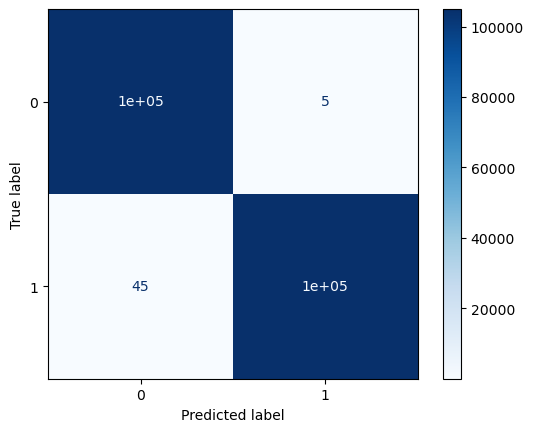

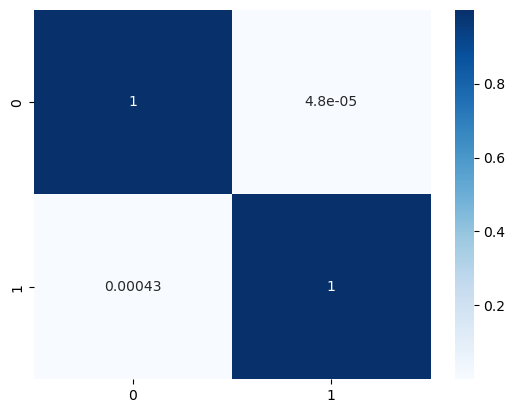

In [7]:
prediction1 = RandomForest(X_train_sample, X_test, y_train_sample, y_test)
# prediction1.predict(pdpred, df)
prediction1.fit()

The accuracy score is 0.999247443451091
 The recall score is 0.9991430611759105
 The f1 score is 0.9992477193517055
 The ROC AUC score is 0.9992474159489937

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.9948 0.9944 0.9964 0.9952 0.9964]

Mean cross validation score: 0.9954399999136001



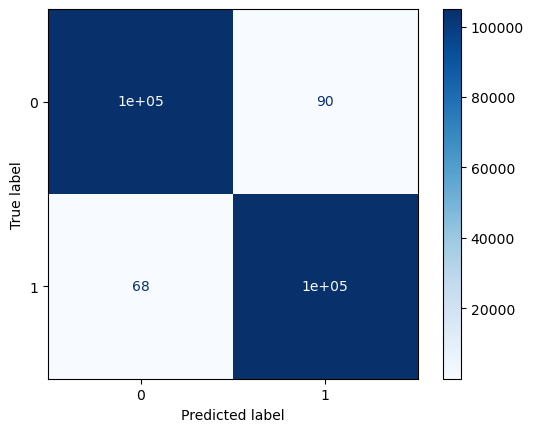

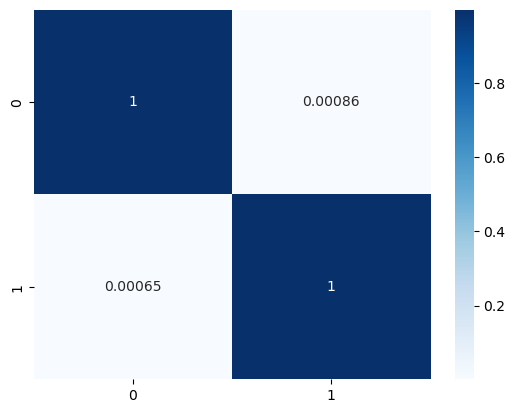

In [13]:
prediction1 = xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)
# prediction1.predict(pdpred, df)
prediction1.fit()

The accuracy score is 0.9996475368062072
 The recall score is 0.9998666120411216
 The f1 score is 0.9996475519146504
 The ROC AUC score is 0.9996475941784193

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.998 1.   ]

Mean cross validation score: 0.9982



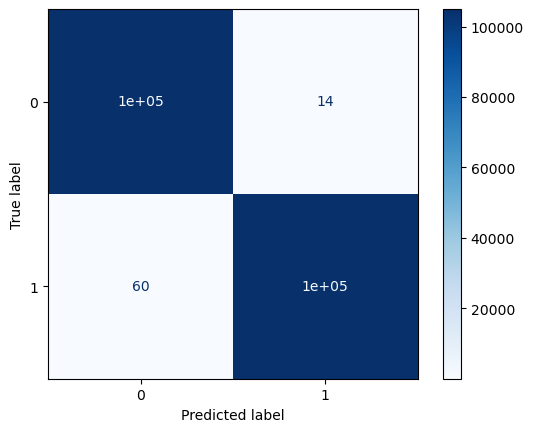

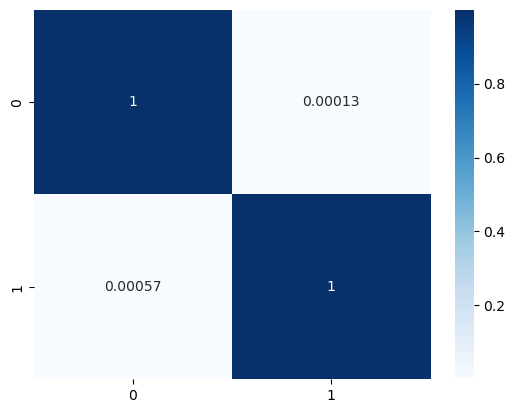

In [17]:
prediction1 = GradientBoost(X_train_sample, X_test, y_train_sample, y_test)
# prediction1.predict(pdpred, df)
prediction1.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ensemble Accuracy: 0.9996904039513982
Ensemble Confusion Matrix:


<Axes: >

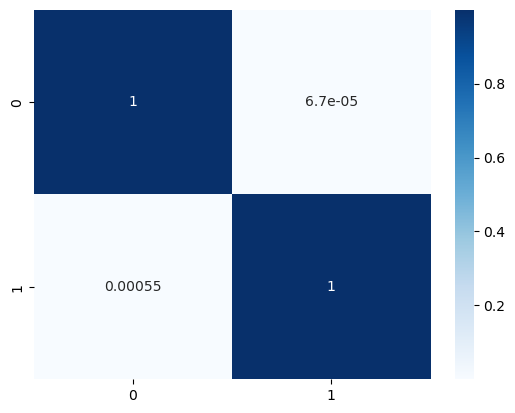

In [7]:
ada_clf = AdaBoostClassifier(
    RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', random_state=42),
    n_estimators=100,
    random_state=42, 
    learning_rate=0.1
)
ada_clf.fit(X_train_sample, y_train_sample)

ensemble_predictions = ada_clf.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
cm = confusion_matrix(y_test, ensemble_predictions)
cm1 = cm / cm.sum(axis=1)[:, np.newaxis]
print(f"Ensemble Accuracy: {ensemble_accuracy}")
print("Ensemble Confusion Matrix:")
sns.heatmap(cm1, annot=True, cmap='Blues')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9996904039513982
 The recall score is 0.9999333028432045
 The f1 score is 0.9996904098497297
 The ROC AUC score is 0.9996904675652912

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.995 0.998 1.    0.999 1.   ]

Mean cross validation score: 0.9984



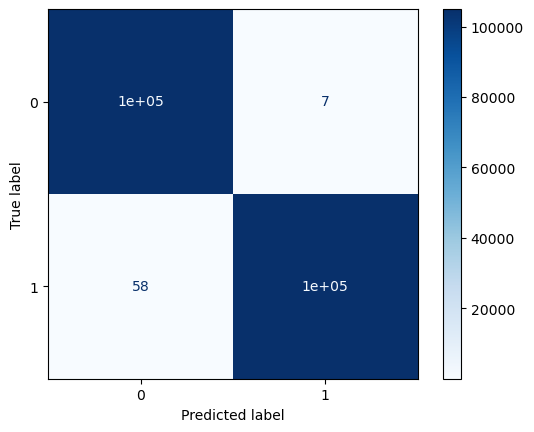

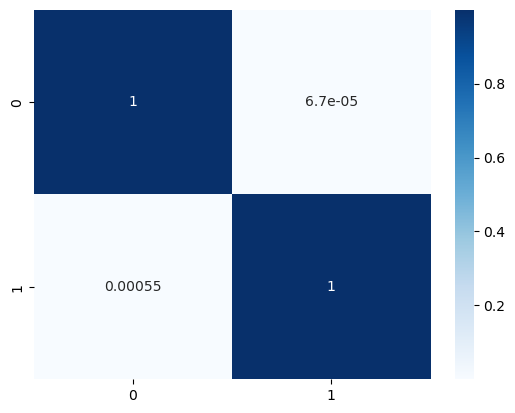

In [20]:
prediction1 = AdaBoost(X_train_sample, X_test, y_train_sample, y_test)
# prediction1.predict(pdpred, df)
prediction1.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 100] loss=0.0028 val_loss=0.0000 scale=2.0000 norm=2.0167
[iter 200] loss=0.0024 val_loss=0.0000 scale=1.0000 norm=1.0080
[iter 300] loss=0.0023 val_loss=0.0000 scale=0.1250 norm=0.1261
[iter 400] loss=0.0023 val_loss=0.0000 scale=0.0625 norm=0.0630
Ensemble Accuracy: 0.9991855242413706
Ensemble Confusion Matrix:


<Axes: >

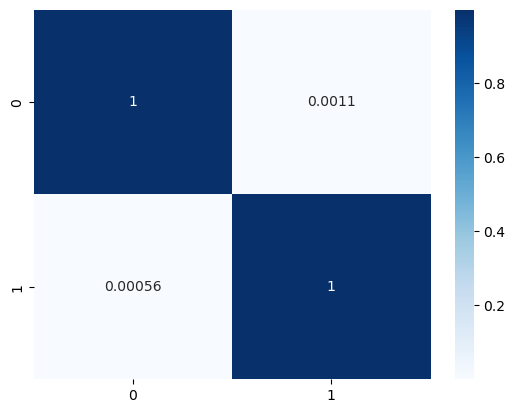

In [8]:
ngb = NGBClassifier()   
ngb.fit(X_train_sample, y_train_sample)
ngb_predictions = ngb.predict(X_test)
ngb_accuracy = accuracy_score(y_test, ngb_predictions)
cm = confusion_matrix(y_test, ngb_predictions)
cm1 = cm / cm.sum(axis=1)[:, np.newaxis]
print(f"Ensemble Accuracy: {ngb_accuracy}")
print("Ensemble Confusion Matrix:")
sns.heatmap(cm1, annot=True, cmap='Blues')

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9991045529671209
 The recall score is 0.9987722821276637
 The f1 score is 0.9991050857784801
 The ROC AUC score is 0.9991044655633214

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.992 0.996 0.998 0.995 0.995]

Mean cross validation score: 0.99519999975



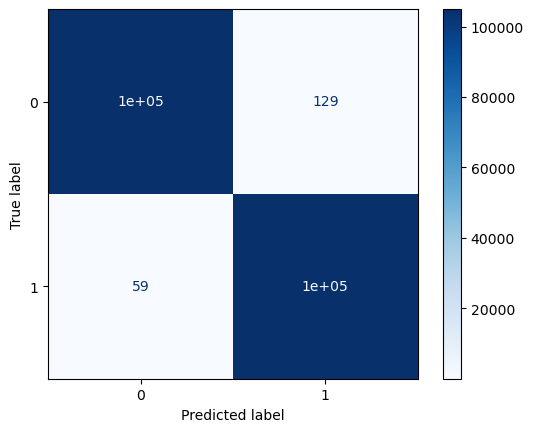

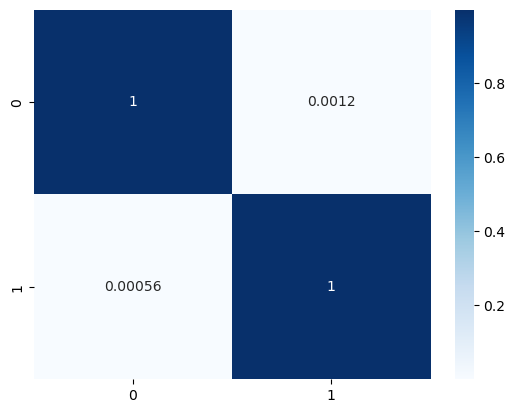

In [10]:
prediction1 = ngboost(X_train_sample, X_test, y_train_sample, y_test)
# prediction1.predict(pdpred, df)
prediction1.fit()

The accuracy score is 0.9985710951602993
 The recall score is 0.9978223866262207
 The f1 score is 0.9985725433471003
 The ROC AUC score is 0.9985708979180814

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.984 0.988 0.996 0.99  0.994]

Mean cross validation score: 0.9903999996999999



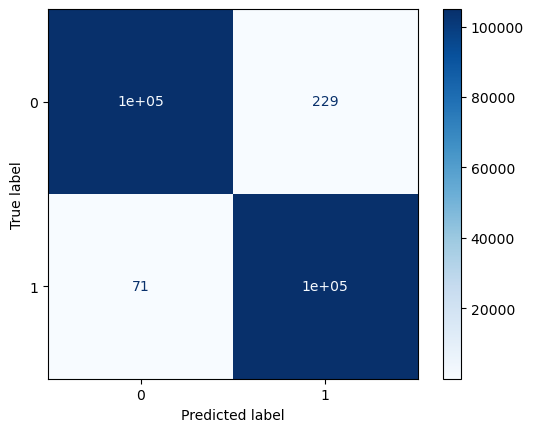

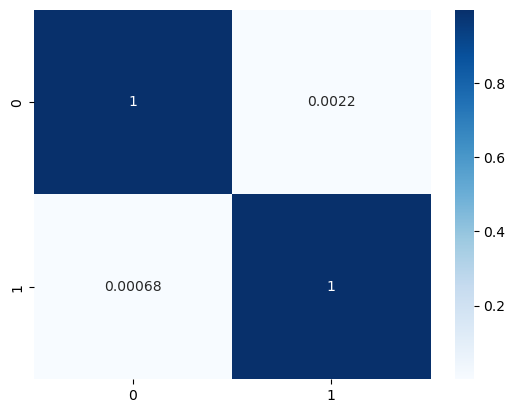

In [11]:
prediction1 = ANN(X_train_sample, X_test, y_train_sample, y_test)

prediction1.fit()